Demonstrate the generation of random decays, and grouping into coincidence windows

In [1]:
from ActivityTools import *
from matplotlib.patches import Rectangle
            
def TimelinesPlot( Timelines ):
    for i, decayTimes in enumerate( Timelines ):
        dummyY = []
        for time in decayTimes:
            dummyY.append( i )
            
        mpl.scatter( decayTimes, dummyY )

def CoincidenceBoxes( Coincidences, CoincidenceTimes, TimeWindow ):
    
    for i, coincidence in enumerate( Coincidences ):
        time = CoincidenceTimes[ i ]
        y = min( coincidence )
        height = max( coincidence ) - y
        y -= 0.1
        height += 0.2
        mpl.gca().add_patch( Rectangle( (time, y), TimeWindow, height, \
                                        linewidth=1,edgecolor='r',facecolor='none') )

In this example we create 20 different decay channels, each with an activity of 1 Bq. The simulation groups 2 seconds of decays into 0.1 second coincidence windows. A new window is opened when a decay occurs with no existing coincidence window.

Points on the plot indicate decays, and rectangles show the coincidence windows.

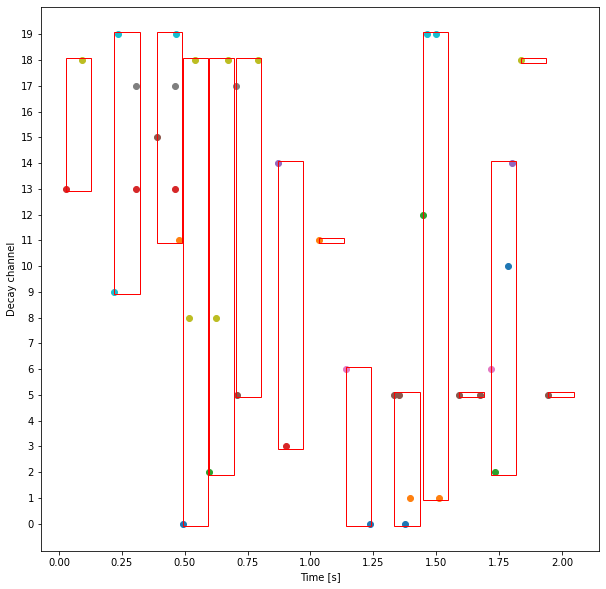

In [2]:
quickTimelines = []
coincidences, coincidenceTimes = GenerateCoincidences( 20 * [1.0], 2.0, 0.1, quickTimelines )
TimelinesPlot( quickTimelines )
CoincidenceBoxes( coincidences, coincidenceTimes, 0.1 )

mpl.xlabel( "Time [s]" )
mpl.yticks( range( 0, 20 ) )
mpl.ylabel( "Decay channel" )
mpl.gcf().set_size_inches( 10, 10 )
mpl.show()

Each coincidence entry is a list of the decay channels included, with multiple entries for the same channel if relevant.

Simulation data can then be sampled from the corresponding channel, although it can be more efficient to perform the sampling and analysis during the timeline generation, rather than trying to create a list of coincidences in full.

In [3]:
print( coincidences )

[[13, 18], [9, 13, 17, 19], [11, 13, 15, 17, 19], [0, 8, 18], [2, 8, 18], [5, 17, 18], [3, 14], [11], [0, 6], [0, 1, 5, 5], [1, 12, 19, 19], [5, 5], [2, 6, 10, 14], [18], [5]]
